<a href="https://colab.research.google.com/github/barcode0725/program/blob/main/tgssnss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Langkah pertama ialah menginstall snscrape.

social networking services atau yang biasa disingkat (SNS) berfungsi untuk mengikis atau memilih data seperti profil pengguna, tagar, atau mencari dan mengumpulkan data yang ditemukan dengan postingan yang relevan.

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Selanjutnya yaitu menginstall library langdetect.

Fungsi dari langdetect untuk mengimplementasi ulang pustaka deteksi bahasa Google ke Python

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=e7b3f260c88d23d4d13651b9131cc3a1da898f395859002c15144e1c052ae800
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
#PROSES INI BERMANFAAT UNTUK MENGIMPOR MODUL SNSCRAPE UNTUK MENANGANI DATA YANG KITA DAPATKAN DARI TWITTER
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [ ]:
# DISINI KITA AKAN MEMASUKAN KATA KUNCI DAN RENTANG WAKTU KATA KUNCI YANG AKAN DICARI
keywords=['LESTI']
start="2022–09–01"
end ="2022–10–13"
max_num=10
fname='tweet.json' 
languages=['id','en']

Lalu mengimport library panda

Fungsi dari Library Panda untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya. Karena pada Library Panda menyediakan struktur data dan analisis data yang mudah digunakan.


In [ ]:
#MEMBUAT VARIABEL "datatw" UNTUK, MENAMPILKAN HASIL DATA YANG DIAMBIL DARI TWITTER
import pandas as pd
datatw=[]

In [ ]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [ ]:
datatw

['Td ngmongin lesti sm tmn2 kerja, ikut gblk2in sbgaimana netizen lainnya, tp pengen sekaligus smbil peluk dia &amp; blg please dont try too hard \U0001fae0',
 '@AdytiaSn Kendak kau lesti Iyo billar kau nian, ringam aku nyingok nyo🤣',
 'Masih Berstatus Tersangka! Bahasa Tubuh Rizky Bilar Diduga Simpan Kekesalan Mendalam Pada Lesti\n#kdrt #LestiKDRT #lestibillar #kdrt \nhttps://t.co/KvaWY44YQs',
 '@uuduknasi_ @jokowi Kira-kira gimana tanggapan lesti liat twit lu',
 '@luculucuaaan Ekspresinya lesti tuh kaya senyum tapi kosong?']

Langkah selanjutnya ialah menginstall Sastrawi 
Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. 

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.1 MB/s 


In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

lalu kita akan menggunakan documents_clean untuk menghapus semua karakter tidak dapat dicetak dari teks

In [ ]:
documents_clean[0:5]

['td ngmongin lesti sm tmn kerja ikut gblkin sbgaimana netizen tp ken sekaligus smbil peluk amp blg please dont try too hard',
 'adytiasn kendak kau lesti iyo billar kau nian ringam aku nyingok nyo',
 'status sangka bahasa tubuh rizky bilar duga simpan kesal pada lesti kdrt lestikdrt lestibillar kdrt https t co kvawyyqs',
 'uuduknasi jokowi kira gimana tanggap lesti liat twit lu',
 'luculucuaaan ekspresi lesti tuh kaya senyum kosong']

selanjutnya kita menggunakan TfidfVectorizer untuk membuat matriks padat di mana setiap kolom adalah kata dalam kosakata kita, dan setiap baris sesuai dengan dokumen.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

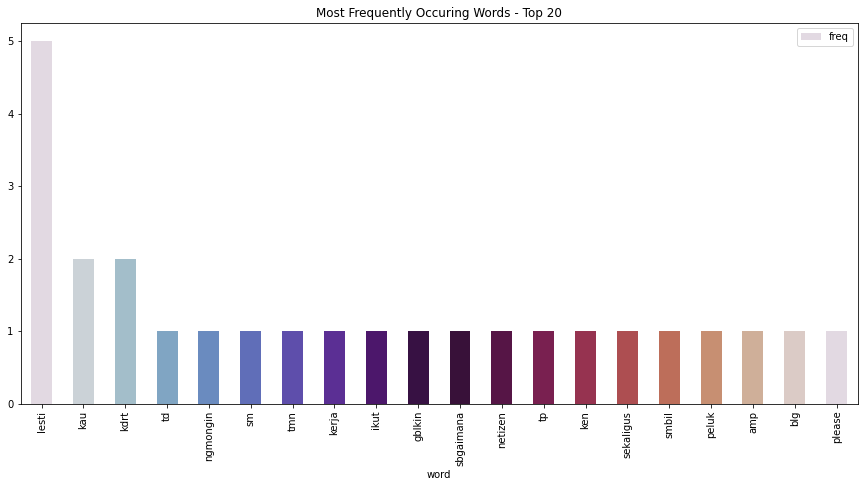

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer() #CountVectorizer, berfungsi untuk menghitung frekuensi kata dalam dokumen.
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:
## IMPORT K-MEANS UNTUK PROSES CLUSTERING
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
# LAKUKAN ORDER CENTROID, UNTUK MEMBERIKAN HASIL UNTUK DI SETIAP CLUSTER
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 kdrt
 lestikdrt
 duga
 lesti
 lestibillar
 kesal
 pada
 https
 rizky
 simpan
Cluster 1:
 lesti
 kau
 uuduknasi
 kira
 nian
 luculucuaaan
 lu
 liat
 twit
 kosong
Cluster 2:
 blg
 lesti
 ngmongin
 hard
 gblkin
 peluk
 please
 kerja
 dont
 sbgaimana




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


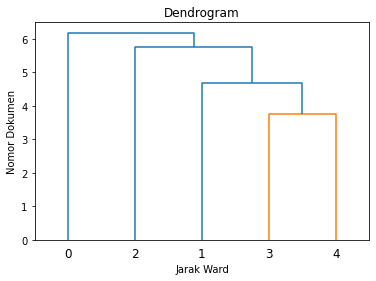

In [ ]:
#UNTUK MELIHAT DIAGRAM DENDROGRAM DARI BAWAH KEATAS
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
#Fungsi Method ward untuk melakukan metode pembentukan cluster yang di dasari oleh hilangnya informasi akibat penggabungan obyek menjadi cluster.
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

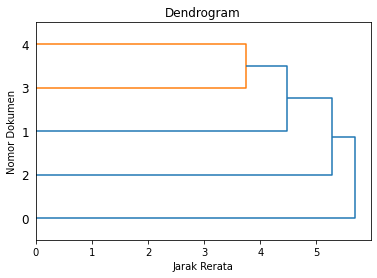

In [ ]:
#UNTUK MELIHAT DIAGRAM DENDROGRAM DARI KIRI KEKANAN
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right") 
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721